<a href="https://colab.research.google.com/github/ikarus-999/AI-NLP-Study/blob/master/STFT_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
print(tf.__version__)

1.15.0


In [2]:
print(tf.executing_eagerly())

True


## check GPU 

In [3]:
from datetime import datetime

startTime = datetime.now()

shape = (int(100000), int(100000))
with tf.device("/gpu"):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

result = sum_operation
print(result)

print("\n" * 2)
print("Time taken:", datetime.now() - startTime)
print("\n" * 2)

ResourceExhaustedError: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install -q librosa

In [6]:
!apt update -qq
!apt install -y -qq ffmpeg

91 packages can be upgraded. Run 'apt list --upgradable' to see them.
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [7]:
!ffmpeg -version

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-

In [0]:
!wget -q https://github.com/Tony607/blog_statics/releases/download/v1.0/siren_mfcc_demo.wav

# Decode wav file

In [9]:
## Check the sampling rate of the WAV file.
audio_file = './siren_mfcc_demo.wav'

import wave
with wave.open(audio_file, "rb") as wave_file:
    sr = wave_file.getframerate()
print(sr)

44100


In [10]:
audio_binary = tf.read_file(audio_file)
waveform = tf.contrib.ffmpeg.decode_audio(audio_binary, file_format='wav', samples_per_second=sr, channel_count=1)
print(waveform.numpy().shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
tf.contrib.ffmpeg will be removed in 2.0, the support for video and audio will continue to be provided in tensorflow-io: https://github.com/tensorflow/io
(59904, 1)


In [11]:
signals = tf.reshape(waveform, [1, -1])
signals.get_shape()

TensorShape([Dimension(1), Dimension(59904)])

# preprocessing

In [12]:
# STFT
waves = tf.signal.stft(signals, frame_length=1024, frame_step=512, fft_length=1024)
print(waves.numpy().shape)

# ComplexWarning: Casting complex values to real discards the imaginary part 
# plt.imshow(np.transpose(array))
# plt.imshow(np.swapaxes(array, 0, 1))

(1, 116, 513)


In [13]:
power_spectrograms = tf.real(waves * tf.conj(waves))
spectrograms = tf.abs(waves)

print(power_spectrograms.numpy().shape)
print(spectrograms.numpy().shape)

(1, 116, 513)
(1, 116, 513)


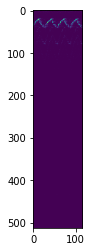

In [14]:
array = power_spectrograms.numpy().astype(np.float)[0]
array2 = spectrograms.numpy().astype(np.float)[0]

plt.imshow(np.transpose(array2))